*This notebook introduce to **Docker**, a little bit about **Docker Container***

# 1. Basic Define

## 1.1 Workflow

* 1️⃣ *Build*: tạo Dockerfile: định nghĩa app và dependencies
* 2️⃣ *Ship* : Push Docker image lên Docker Hub
* 3️⃣ *Run* : Pull image và chạy như một container trên bất kỳ máy chủ Docker nào

> bash  
> *# Build*   
> docker build -t myapp:v1
>
> *# Ship*  
> docker push username/myapp:v1
>
> *# Run*  
> docker run -d -p 8080:80 username/myapp:v1

## 1.2 Components

* **Dockerfile**: file text chứa hướng dẫn build Docker image
* **Docker Compose**: tool để định nghiwax và chạy multi-container Docker app
* **Docker Swarm**: công cụ quản lý orchestration (điều phối) giúp chạy và quản lý nhiều container trên nhiều node (máy vật lý hoặc máy ảo) trong một hệ thống phân tán.
* **Docker Network**: cách Docker quản lý kết nối giữa các container với nhau hoặc giữa container với môi trường bên ngoài.
* **Docker Volume**: Lưu trữ, chia sẻ và quản lý dữ liệu lâu dài.

## 1.3 Use Cases

**a. MICROSERVICES ARCHITECHTURE**  
* So sánh:
    * **Monolithic**: Toàn bộ ứng dụng là một khối duy nhất → Khó mở rộng và bảo trì.
    * **Microservices**: Chia thành nhiều service độc lập → Dễ dàng mở rộng, triển khai linh hoạt.

* ✅ Ưu điểm:
    * Tách biệt dịch vụ: mỗi service có **codebase**, **database** và logic riêng
    * Triển khai độc lập: k ảnh hưởng toàn bộ hệ thống
    * Giao tiếp qua API: **REST API, gRPC hoặc Message Queue (RabbitMQ, Kafka)** có thể dùng **Service Discovery** để quản lý service động
    * Khả năng mở rộng độc lập theo nhu cầu
    * Khả năng chịu lỗi: Một service bị lỗi nhưng các service khác vẫn ok

* 🔥 Các công nghệ:
    * **Containerization**: **Docker, Kubernetes**
    * **API Gateway**: Kong, Traefik, Nginx, Istio
    * **Service Discovery**: Consul, Eureka, Kubenetes Service
    * **Communication**: REST, gRPC, RabbitMQ, Kafka
    * **Monitoring & Logging**: Prometheus, ELK Stack, Grafana
    * **Security**: OAuth2, JWT, Keycloak

**b. Continuous Integration/Continuous Deployment (CI/CD)**

* 🚀 **Tích hợp(CI), kiểm thử, triển khai (CD)** :
    * **CI**: Tự động build, test code mới, sử dụng **GitHub Actions, Jenkins, GitLab CI**
    * **CD**: Tự động triển khai lên môi trường staging/prod: **Docker, Kubernetes, ArgoCD**

* 🛠 **Hoạt động**:
  * 1️⃣ **Commit Code**: dev push code lên GitHub
  * 2️⃣ **Build & Test (CI)**: Hệ thống tự động chạy:
    * Kiểm tra syntax
    * Chạy unit test, integration test
    * Build **Docker Image** nếu cần
  * 3️⃣ **Deploy (CD)**:
    * Build & test thành công, code được deploy lên server
    * Sử dụng **Docker + Kubernetes** để triển khai

**c. Development Environment**

✅ **Docker** giúp tạo môi trường phát triển dễ dàng bằng cách container hóa công cụ, thư viện và dependencies cần thiết

**d. Application Isolation**

✅ Chạy nhiều phiên bản của application trong cùng host

**e. Legacy Application Migration**

✅ Containerizing ứng dụng cũ để dễ quản lý và triển khai

* Ứng dụng cũ (Legacy Applications) thường gặp các vấn đề:  
❌ Phụ thuộc vào môi trường cũ (OS, thư viện, framework).  
❌ Khó mở rộng và bảo trì.  
❌ Triển khai phức tạp, không phù hợp với CI/CD.  

* 🔹 Docker giúp gì?  
✅ Gói gọn ứng dụng cùng dependencies trong một container.  
✅ Chạy trên mọi nền tảng có Docker mà không lo khác biệt môi trường.  
✅ Hỗ trợ CI/CD, dễ scale với Kubernetes.  

# 2. Installing

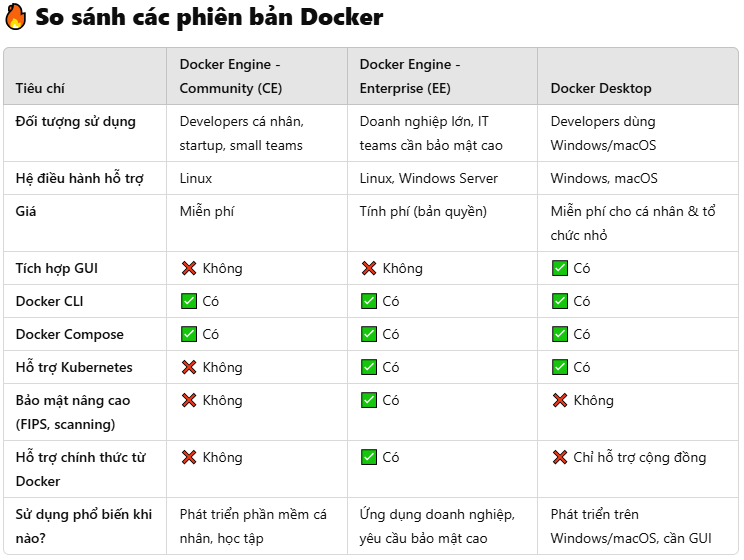

# 3. Docker containers

## 3.1 Basic commands

* List containers

> *# all **running** containers*  
> `docker ps`

> *# all containers*  
> `docker ps -a`

* Start/stop containers

> `docker stop <container_id_or_name>`

> `docker start <container_id_or_name>`

> `docker restart <container_id_or_name>`

* Remove

> *# remove **a stopped** container*  
> `docker rm <container_id_or_name>`

> *# force remove **a running** container*  
> `docker rm -f <container_id_or_name>`

* Running

> *# **Detached Mode**: run container in background*  
> `docker run -d <image_name>`

> *# **Interactive Mode**: run container and interact with it*  
> `docker run -it <image_name> /bin/bash`

> *# **Port Mapping**: Map container's port với host*  
> `docker run -p <host_port>:<container_port> <image_name>`

> Ex:  
> `docker run -d -p 80:80 nginx`  
> `docker run -d --name my-apache -p 8080:80 httpd` : đặt tên cho docker mới tạo của image httpd là my-apache

> *# **Limitting memory, cpu***  
> `docker run -d --memory=512m <image_name>`  
> `docker run -d --cpus=0.5 <image_name>`  

* Log

> *# View container logs*  
> `docker logs <container_id_or_name>`

> *# Follow container logs in real-time*  
> `docker logs -f <container_id_or_name>`

* Execute commands in **running containers**

> `docker exec -it <container_id_or_name> <command>`

Ex:  
> `docker exec -it my_container /bin/bash`

Ex:
>`docker exec -it my-apache /bin/bash`  
>`echo "<h1>Welcome to MI!</h1>" > /usr/local/apache2/htdocs/index.html`  
>`exit`


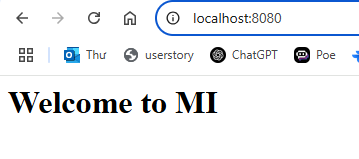

* Container Networking

Docker cung cấp **mạng ảo** để các container có thể giao tiếp với nhau, với máy chủ host, hoặc với internet.

Các loại network trong Docker:

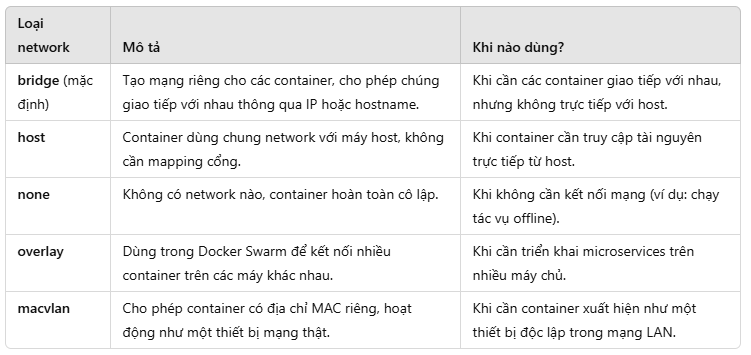

> *# **Listing** network*  
> `docker network ls`

> *# **Creating** a network*  
> `docker network create my_network`

> *# **Connecting** a container to a network*  
> `docker run -d --network my_network --name my_container <image_name>`

* Data Persistence with Volumes

> *# **Creating**  a Volume*  
> `docker volume create my_volume`

> *# **Running** container with a Volume*  
> `docker run -d -v my_volume:/path/in/container <image_name>`

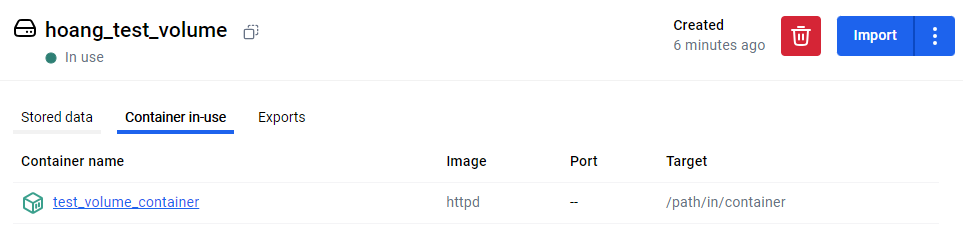

* Container health check

Docker cung cấp khả năng kiểm tra sức khỏe tích hợp sẵn, cho phép *giám sát* tình trạng của các container.Định nghĩa kiểm tra sức khỏe trong **Dockerfile**

> `HEALTHCHECK --interval=30s --timeout=10s --start-period=5s --retries=3 \`  
>    `CMD curl -f http://localhost/ || exit 1`

* Khi container khởi động, Docker **đợi 5 giây** (`--start-period=5s`).
* Sau đó, cứ **30 giây** Docker lại kiểm tra sức khỏe container bằng cách gọi `curl http://localhost/`.
* Nếu mất hơn **10 giây** để phản hồi, kiểm tra thất bại.
* Nếu container trả về lỗi **3 lần liên tiếp**, nó bị đánh dấu là **"unhealthy"**.

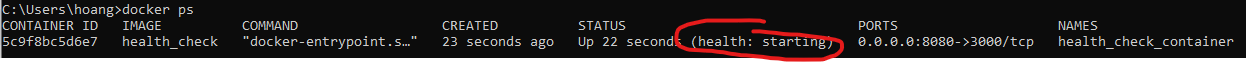

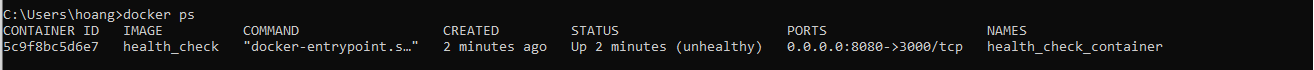

* Cleaning up

> *# **Remove** all stopped containers*  
> `docker container prune`

> *# **Remove** all unused resources (containers, network, images)*  
> `docker system prune`